# Tic Tac Toe - Reinforcement Learning

![](http://img1.encyclopedie-incomplete.com/local/cache-vignettes/L440xH381/morpion_tic-tac-toe-b3a0a.jpg)

##### Introduction

This notebook will hold a few experiments I made during my discovery of Reinforcement Learning. <br>
I wanted to build a simple game with all the environment-agent components : 
- The environment modelling and the game
- The agents : Human, Random, Rules-Based, and RL based

What was best than a simple **Tic Tac Toe** game then ? <br>
The environment is only a 3*3 grid with 3 states possible by cell. That sounded like a perfect playground. 

##### Summary
1. How to set up and build an environment
2. Looking at some games 
3. Training a RL Agent
4. First experiments
5. Improving the RL Agent
6. Second experiments

###### Links and references

- [Udemy course on RL](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/)  
- [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/) Andrej Karpathy's blog article on RL (always a reference)
- [Beginner's guide to RL](https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/) - Analytics Vidhya
- [Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf) - OpenAI
- [Davild Silver course on RL at UCL]()

##### Libraries

In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("C:/git/machine-learning/")

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


##### Import the Tic Tac Toe library
To improve readibility and adopt a library oriented philosophy, most of the code is written in my general purpose AI library.<br>
Available in the repo https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py

In [2]:
from ai.rl.tictactoe import *

***

# Set up the environment
To model this problem, we will take an Oriented Object Programming approach and define :  
- A grid made of cells
- An AI agent trained by RL and a AI agent that knows rules
- An environment for the agents to discover the grid with rules
- A Game to simulate a run of the Tic Tac Toe Game 

## Define the grid
In this section I will describe the modelling approach for those type of problems. <br>
I will show sections of the code, but the full reasoning is available at https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py


### Cell
I could have considered a tic tac toe grid as a numpy matrix. <br> 
But I prefer the approach of taking a grid of 3x3 "Cell" objects with more properties. <br>
Thus I defined a Cell class with a few properties : 
- a **value** attribute : 0 for an empty cell, 1 for a cell occuped by the first player, 2 for a cell occupied by the second
- a **vectorizing** method : to encode the value in a one hot vector, example [0,0,1] for a value of 2, this is how we will consider a cell value for the RL part
- a **representation** to display a game : empty if not occupied, otherwise "x" for player 1 and "o" for player 2

### Grid

A grid is an object made of **Cells** objects. <br>

##### The important properties are mostly the rules in the environment : 
- Is a game done ? Who has won ? Is it a draw ?
- You cannot tick a cell already occupied

##### The important methods will help me to
- change the state of a cell (occupied by one player)
- get the position and number of free and occupied cells (useful to define the rules of the environment)

In [3]:
# Define an empty grid
example_grid = Grid()

# Set two ticks ((position,player))
example_grid.set_value((1,1),1)
example_grid.set_value((2,2),2)

# Visualize the grid and the state of the game
example_grid

|   |   |   |
|   | x |   |
|   |   | o |


3x3 TicTacToe grid

## Define the agents
The agents (players) are the entities interacting with the environment (the grid). <br> 
Every agent designed here will be objects inherited from a agent baseline class. 

### The agent baseline

The Agent class is an abstract class with mostly void methods that are not used by the agents unless the RL Agent. <br>
In all cases, the agents will have to consider this problem : <br> 
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/11131906/figtmp7.png)<br><br>
This means that considering the current state of the environment, the agent will have to predict an action to make in this environment. <br>
Thus what changes between the different agents are : 
- How to react to a current state ? using the ``predict`` method
- How to process the rewards (only for the RL agent that gains from experience and store data from the environment along its existence)

### The Human agent
The action decision function for the Human agent is quite straightforward, it waits for the user input a position to place the tick on the grid. 

### The random AI agent
The action decision function is even more simple, it takes a random pick among all the free possibilities on the grid. 

### The rules-based AI agent
The action decision function for the rules-based agent is good but intentionally not perfect. <br>
I wanted the RL agent to be able to find the flaw in the rules of the agent.<br>
Then the rules are hard-coded and are in the following order : 
- At the first turn to play we chose either the corners or the center of the grid
- The attack : if we already have two marks on a row/column, we place the third to win the game
- The defense : if the opposite player has already two marks on a row/column, we place the third to block the winning coup
- If already one mark, make a second to improve your likelihood to win
- Otherwise we sample a random action

###### Improvements
Having a perfect rules-based agent is completely feasible at Tic Tac Toe, the number of states is low.<br>
The best solution is to search a minimax tree with alpha beta pruning

### The RL AI agent
The RL agent properties are: 
- The model is policy gradients with discounted rewards
- The neural network architecture is a simple feed-forward neural network with 2 hidden layers and 100 hidden units by layer with a SGD optimizer

***
# Some games

## Between two random AIs

In [11]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_Random_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game
time.sleep(1)
game.run_episode()

| o | x | x |
| o | x | o |
| o | o | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


##### Here is an example game :
![](images/game_two_random_agents.gif)

## Between rules-based AI and random AI

In [15]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_Rules_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game
time.sleep(1)
game.run_episode()

| x | x | o |
| o | o | x |
| o |   | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


##### First example
As expected in this game, the rules-based agent ("o") crushed the random agent ("x")
![](images/game_random_rules_agents.gif)

##### Second example
In the second game, there are two phases : 
- The Rules based agent blocked the Random agent on the third column
- Then it attacked on the first column, but was blocked by chance by the random agent
- However it got the diagonal right to secure the win
![](images/game_random_rules_agents2.gif)

***
# RL agent - first model : feed forward neural network with policy gradient
![](https://learnaboutdogs.files.wordpress.com/2011/12/positive-dog-training.jpg)

## Model and algorithm

The reinforcement learning algorithm used in this section is **policy gradient**. <br>
By default the algorithm is built upon a simple feed forward neural network with the following structure : 
- 2 layers with 100 hidden units
- input layer of dimension 27 (3*3 (grid) * 3 (possible states for a cell))
- optimized with Stochastic Gradient Descent

## Random VS RL Agent

### First attempt without tuning anything

##### Training the agent for 20 000 episodes

In [47]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_RL_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game
game.run_n_episodes(20000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:13<00:00, 272.33it/s]


##### Average running reward
If we look at the average unning reward, we can see that the performance is increasing over training.<br>
The average reward is negative for a short period of episodes (~100) then quickly becomes positive. <br>

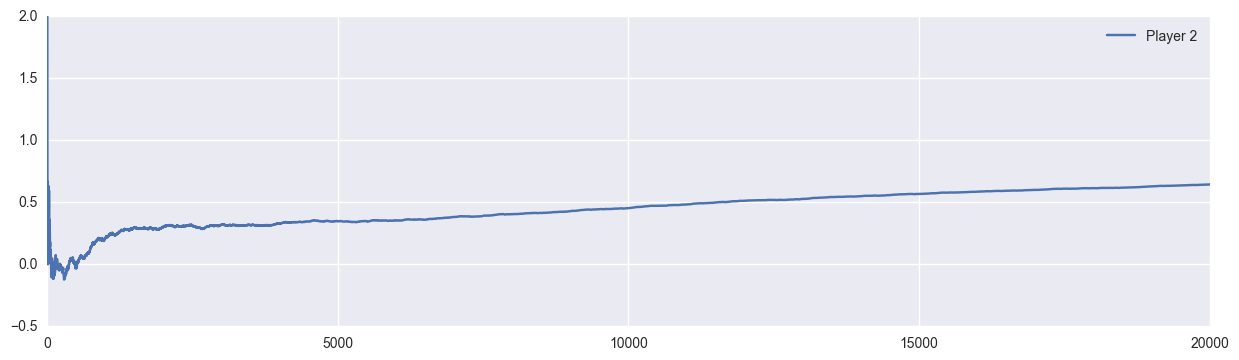

In [49]:
game.plot_running_rewards(player2 = True)

However it is difficult to perceive the actual performance because of the nature of the reward (-2, -1 or + 2).<br>
Let's look at the results another way

##### Running results
We can measure the % of games won or draw or lost on a series of consecutive games over training.<br>
Taking a window of 100 episodes that we can slide over the rewards, we can get the evolution of the ratio of games won. <br><br>
- Indeed, at the beginning when the two agents are random the results are almost 50-40%, 
- Over 5000 episodes the RL agent won 60% of the games
- Over 20000 episodes the RL agent won 70% of the games
- We can also see that the number of draw games fell quickly from 15% to +5% of the games

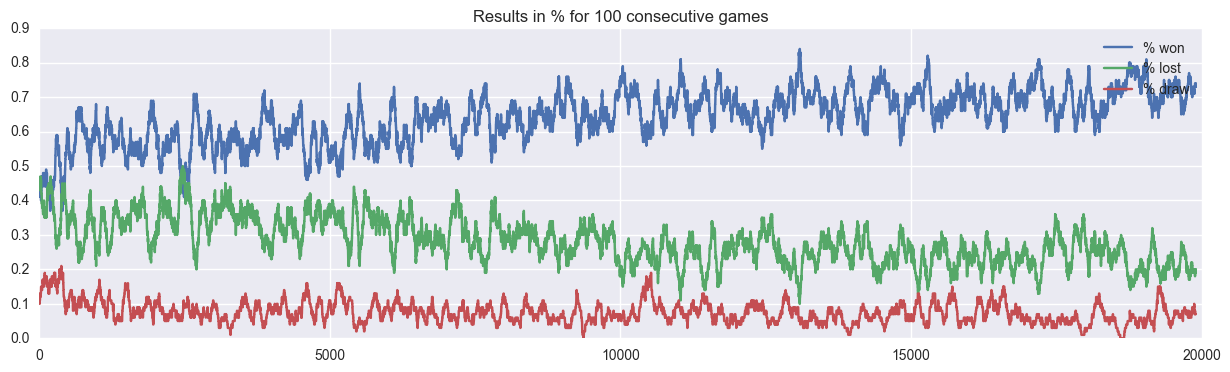

In [50]:
game.plot_results_during_training(player2.running_rewards,rollback=100)

We can look at the same results with softer trends on 1000 consecutive games

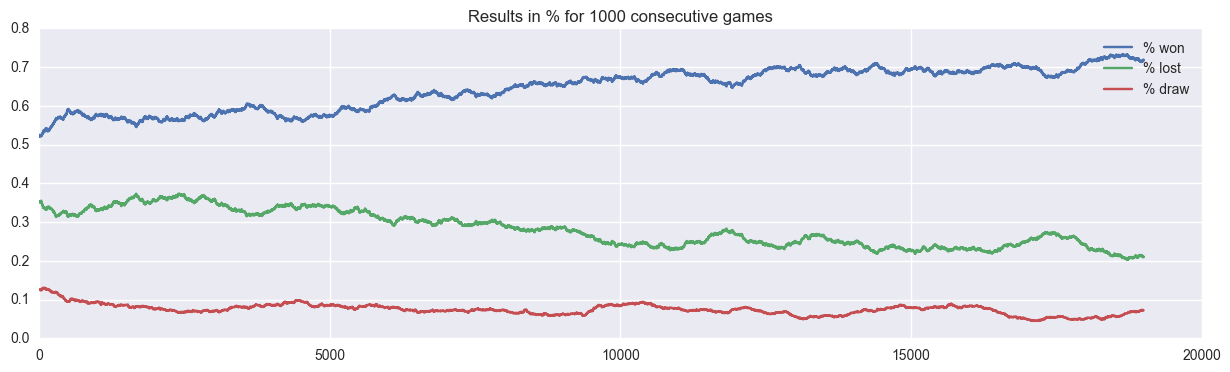

In [51]:
game.plot_results_during_training(player2.running_rewards,rollback=1000)

To summarize we get a 20% of games lost at the end of the training, which is good but not even at the human level against a pure random agent.

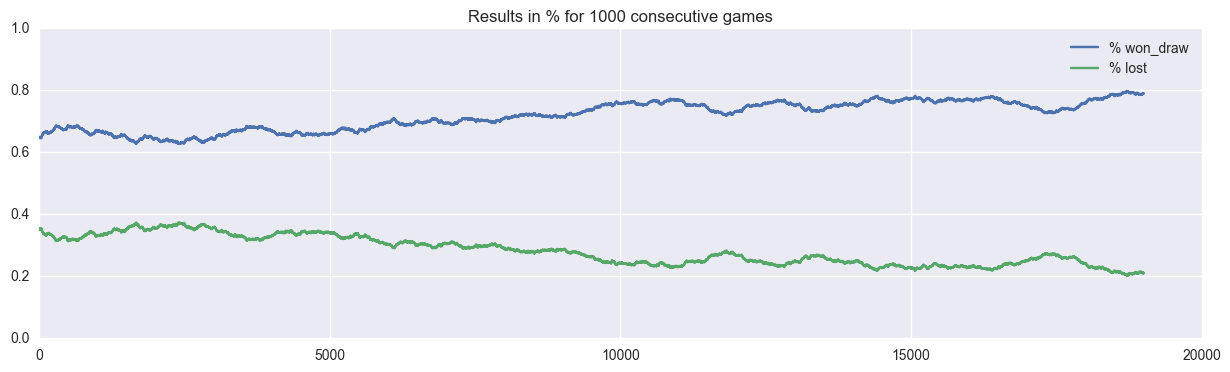

In [53]:
game.plot_results_during_training(player2.running_rewards,rollback=1000,fields = ["won_draw","lost"])

### Tuning the learning rate

In [3]:
def tune_learning_rate(lr,n_episodes = 20000):
    # Define the players
    player1 = AI_Random_Agent()
    player2 = AI_RL_Agent(lr = lr)

    # Define the game between the two players
    game = Game(player1,player2)

    # Launch n episodes of the game
    game.run_n_episodes(n_episodes)

    # Plot the results
    game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### lr = 0.01
Indeed the agent is better over time, yet it is extremely slow. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:13<00:00, 273.56it/s]


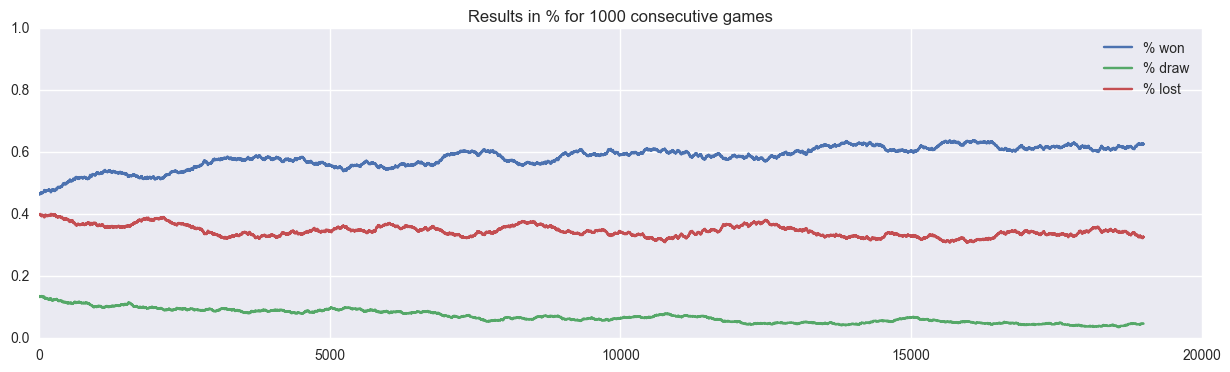

Wall time: 1min 15s


In [10]:
%%time
tune_learning_rate(0.01)

##### lr = 0.001
As expected, it is even slower with a smaller learning rate. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:20<00:00, 247.73it/s]


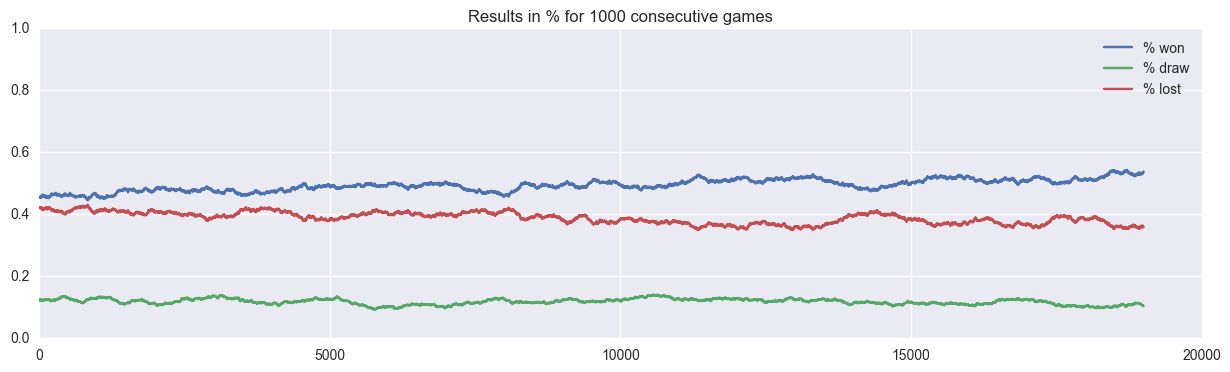

Wall time: 1min 23s


In [11]:
%%time
tune_learning_rate(0.001)

##### lr = 1

  0%|                                                                                                                                                                         | 1/20000 [00:00<2:31:19,  2.20it/s]C:/git/machine-learning\ai\rl\tictactoe.py:600: RuntimeWarning: invalid value encountered in true_divide
  probas = probas / np.sum(probas)
C:/git/machine-learning\ai\rl\tictactoe.py:573: RuntimeWarning: invalid value encountered in less
  choice = np.random.choice(range(len(probas)),p = probas)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:45<00:00, 188.95it/s]


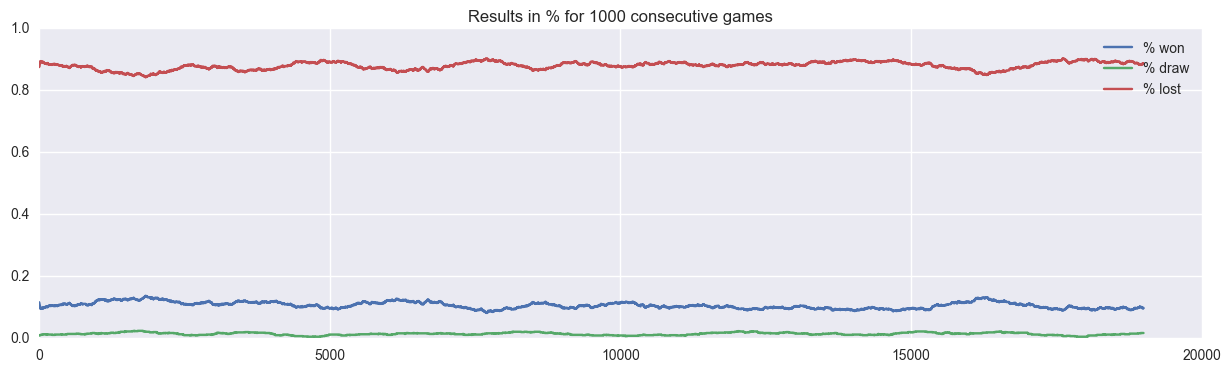

Wall time: 1min 48s


In [13]:
%%time
tune_learning_rate(1.0)

### Tuning the epsilon in the epsilon-greedy exploration-exploitation dilemma solution

Now I'd like to try some epsilon to see the impact of exploration on the training of the agent. <br>
We will keep a learning rate of 0.1.

In [16]:
def tune_epsilon(epsilon,n_episodes = 20000):
    # Define the players
    player1 = AI_Random_Agent()
    player2 = AI_RL_Agent(epsilon = epsilon)

    # Define the game between the two players
    game = Game(player1,player2)

    # Launch n episodes of the game
    game.run_n_episodes(n_episodes)

    # Plot the results
    game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### Exploration : 5%
In this game a 5% exploration epsilon allowed to reach 80% of games won in 20,000 episodes. <br>
Making it much faster than what we had before. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:16<00:00, 261.68it/s]


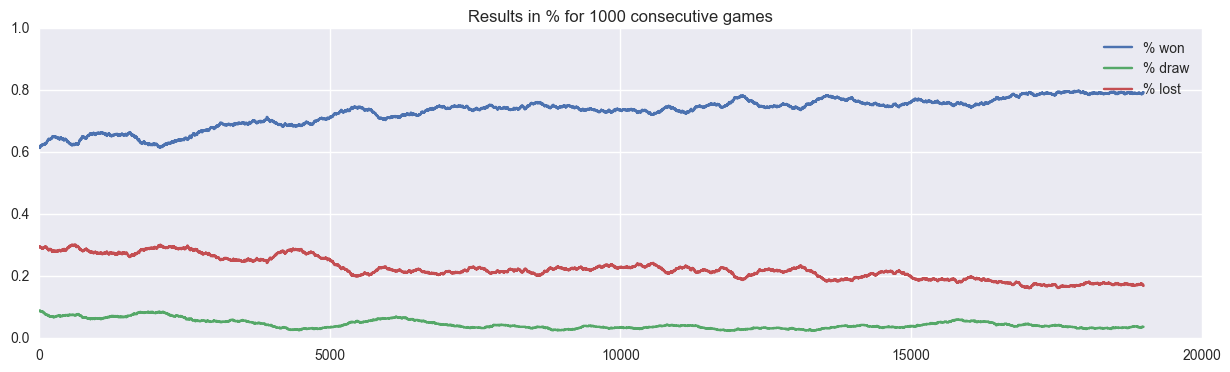

In [17]:
tune_epsilon(0.05)

##### Exploration : 50%
As expected, with more exploration the training is much slower.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:18<00:00, 256.23it/s]


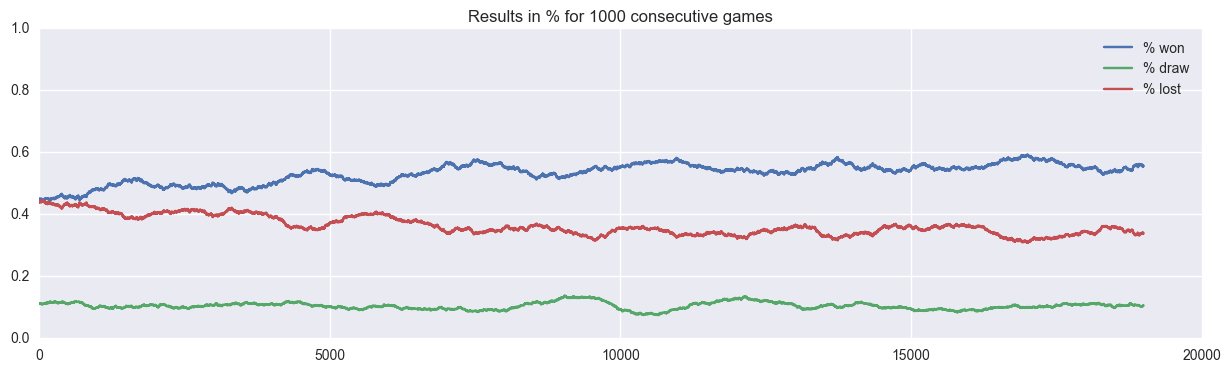

In [18]:
tune_epsilon(0.5)

### Tuning the discounted factor Gamma

In [22]:
def tune_gamma(gamma,n_episodes = 20000):
    # Define the players
    player1 = AI_Random_Agent()
    player2 = AI_RL_Agent(gamma = gamma,epsilon = 0.05)

    # Define the game between the two players
    game = Game(player1,player2)

    # Launch n episodes of the game
    game.run_n_episodes(n_episodes)

    # Plot the results
    game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### Gamma : 1.0

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:13<00:00, 270.40it/s]


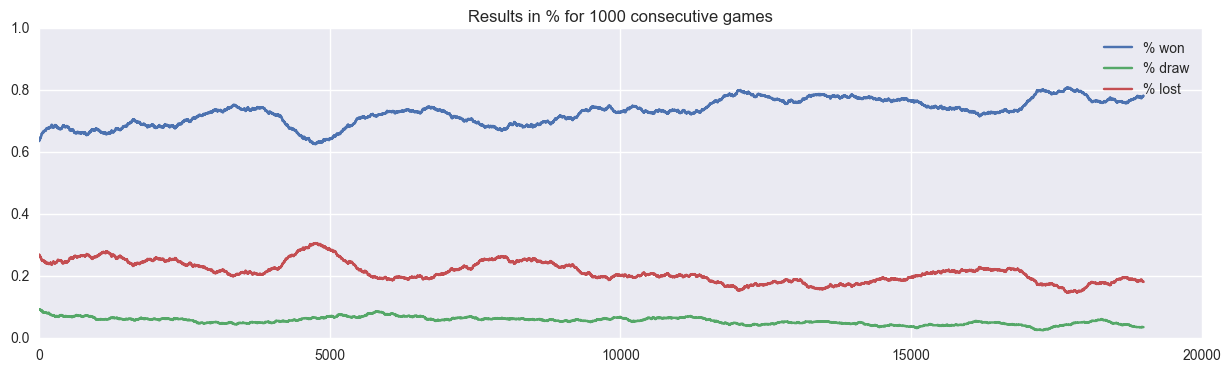

In [23]:
tune_gamma(1.0)

##### Gamma = 0.8

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:11<00:00, 278.12it/s]


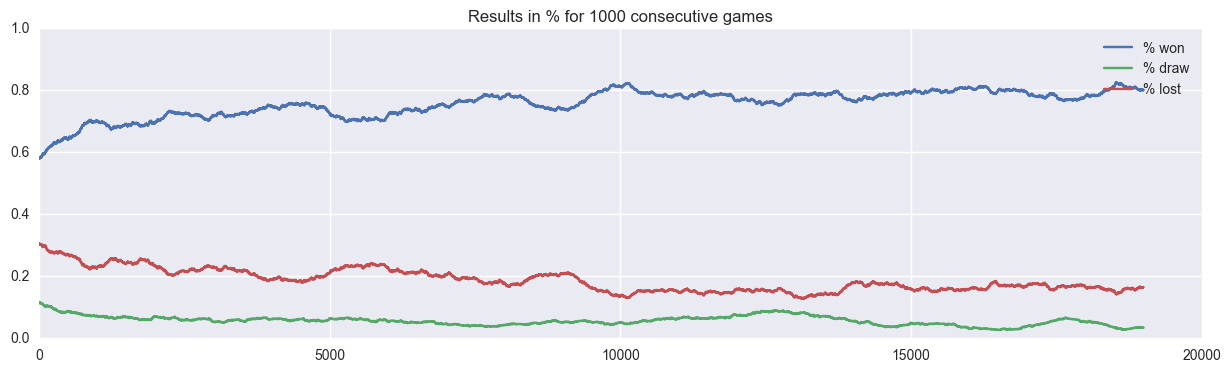

In [24]:
tune_gamma(0.8)

##### Gamma = 0.01

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:11<00:00, 278.35it/s]


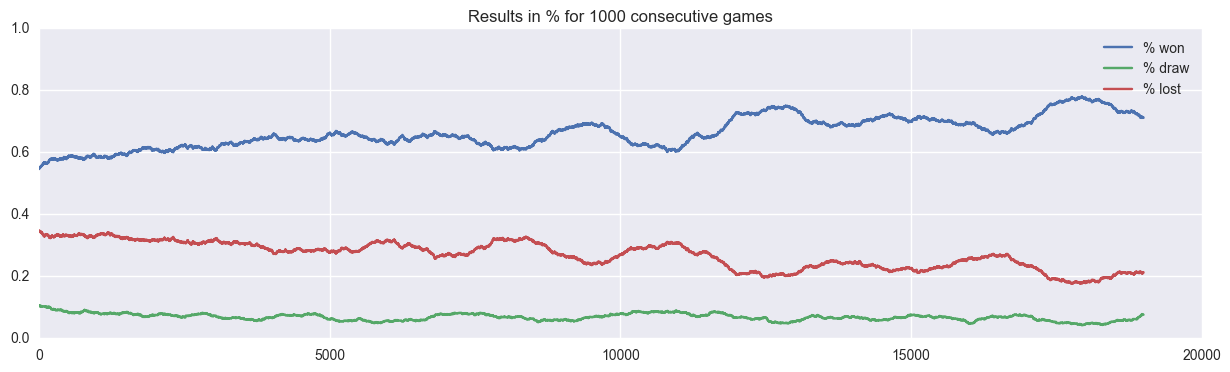

In [25]:
tune_gamma(0.01)

### Tuning the number of hidden units in the feed forward neural network

In [26]:
def tune_H(H,n_episodes = 20000):
    # Define the players
    player1 = AI_Random_Agent()
    player2 = AI_RL_Agent(H = H,epsilon = 0.05)

    # Define the game between the two players
    game = Game(player1,player2)

    # Launch n episodes of the game
    game.run_n_episodes(n_episodes)

    # Plot the results
    game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### H = 500

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:33<00:00, 129.96it/s]


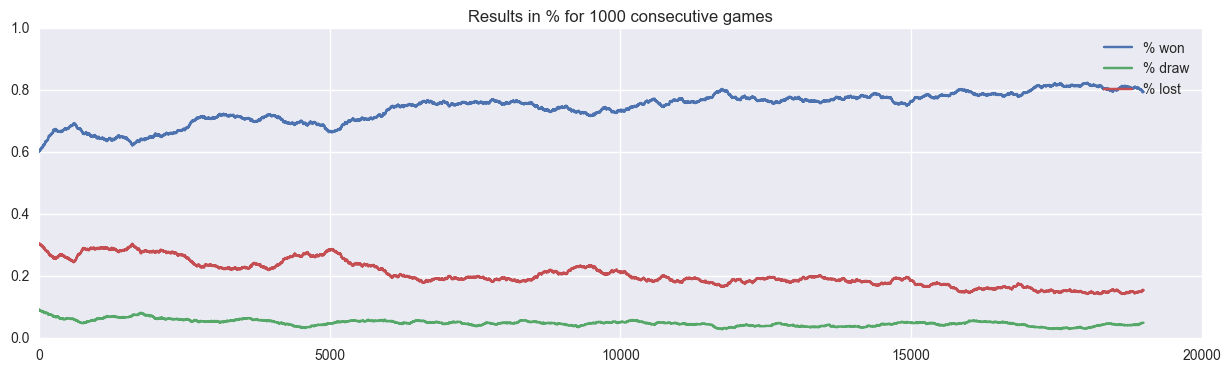

In [27]:
tune_H(500)

### Checking the results for the best hyperparameters

In [28]:
params = {
    "epsilon":0.05,
    "lr":0.1,
    "H":100,
    "gamma":0.8,
}

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [04:13<00:00, 197.09it/s]


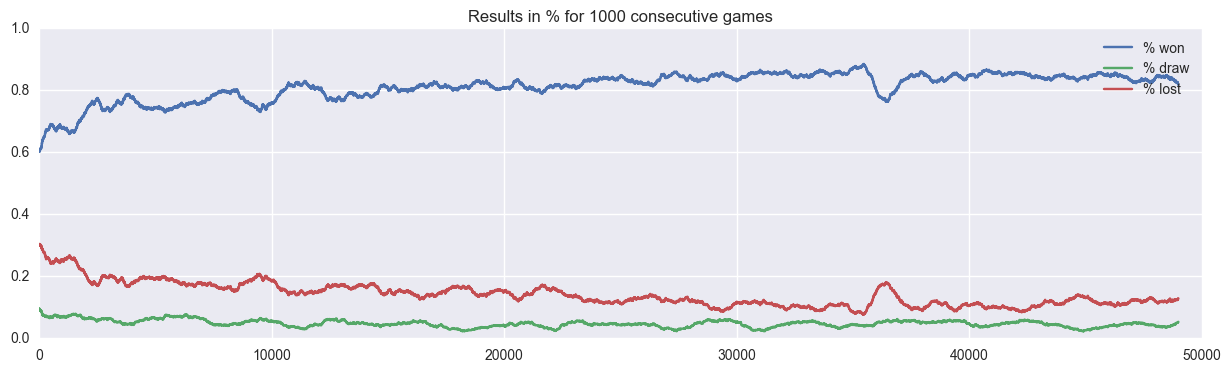

In [29]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_RL_Agent(**params)

# Define the game between the two players
game = Game(player1,player2)

# Launch n episodes of the game
game.run_n_episodes(50000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

In [35]:
game.run_episode()

|   | x | x |
| o | o | o |
| o | x | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


##### Let's look at three games

The probabilities for each move for the RL agent ("o") are displayed<br>
In the 3 following games the agent won without difficulty. 
![](images/game_random_rl_agents.gif)

The agent knows that the center is probably the best choice for a first move

![](images/game_random_rl_agents2.gif)

In the third game, the agent is blocked on the diagonal, but succeed to win by countering on a row. 

![](images/game_random_rl_agents3.gif)

## Rules Based VS RL Agent
### Training the RL agent from scratch
The agent was able to learn against a dummy random agent. Now, we can try with the Rules-based agent. <br>
I had intentionally not hard-coded all the rules, so that the RL can find and exploit the failures of the agent.<br>
##### Let's try a first set of 20,000 games with a not trained virgin agent
The performance are not great. The average reward is clearly negative.<br>
However in 20,000 games the agent goes from losing 80% of the game to only 20%<br>
Winning goes from 5% to 20%, Draws goes from 20% to 60%

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:20<00:00, 142.23it/s]


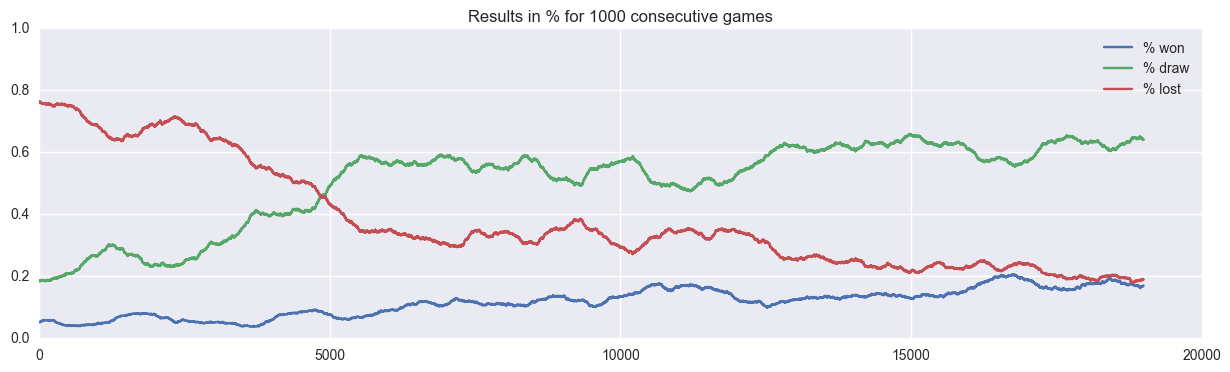

In [37]:
# Define the players
player1 = AI_Rules_Agent()
player2 = AI_RL_Agent(**params)

# Define the game between the two players
game = Game(player1,player2)

# Launch n episodes of the game
game.run_n_episodes(20000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### We can try another set of 20,000 games to see at least if winning can be more frequent than losing
With 20,000 more episodes, the RL agent becomes better than the rules-based agent around the 30,000th episode.<br>
Around the 40,000 winning almost overthrown the draws

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:27<00:00, 135.24it/s]


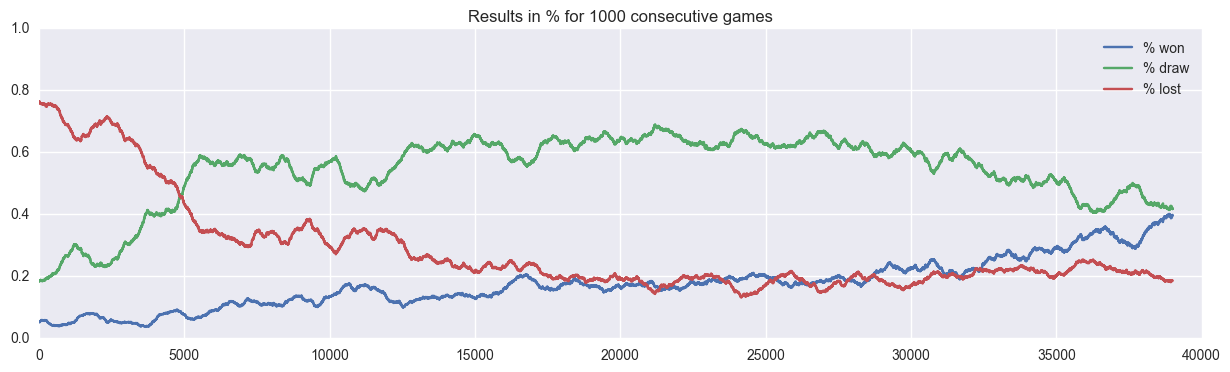

In [38]:
# Launch n episodes of the game
game.run_n_episodes(20000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

##### Let's play another 60,000 episodes

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:30<00:00, 133.16it/s]


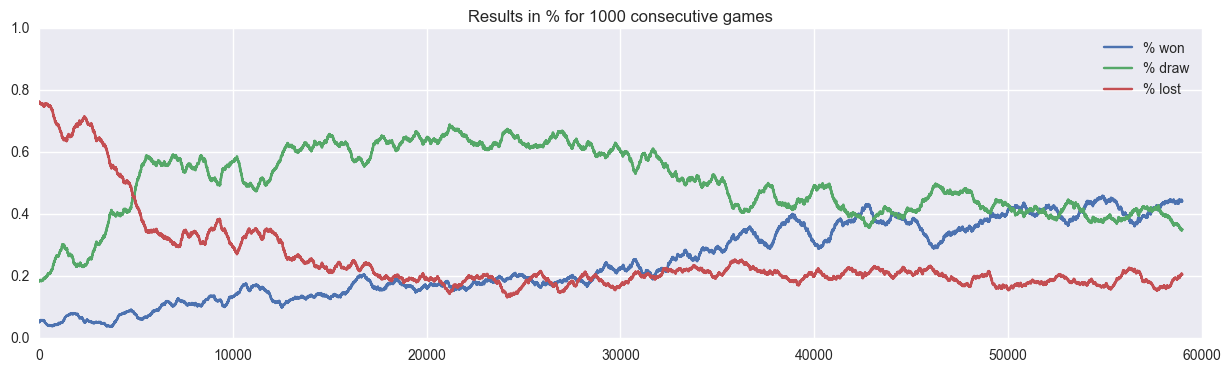

In [39]:
# Launch n episodes of the game
game.run_n_episodes(20000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:28<00:00, 134.96it/s]


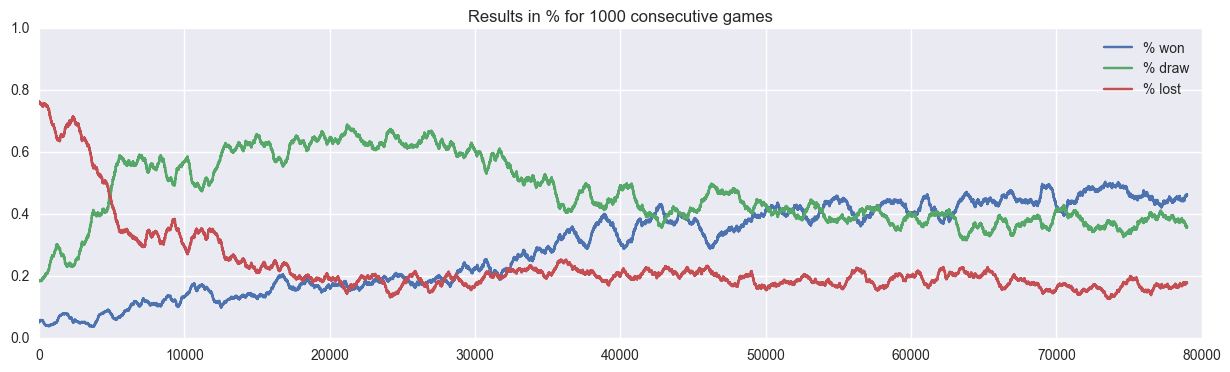

In [40]:
# Launch n episodes of the game
game.run_n_episodes(20000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [02:31<00:00, 132.44it/s]


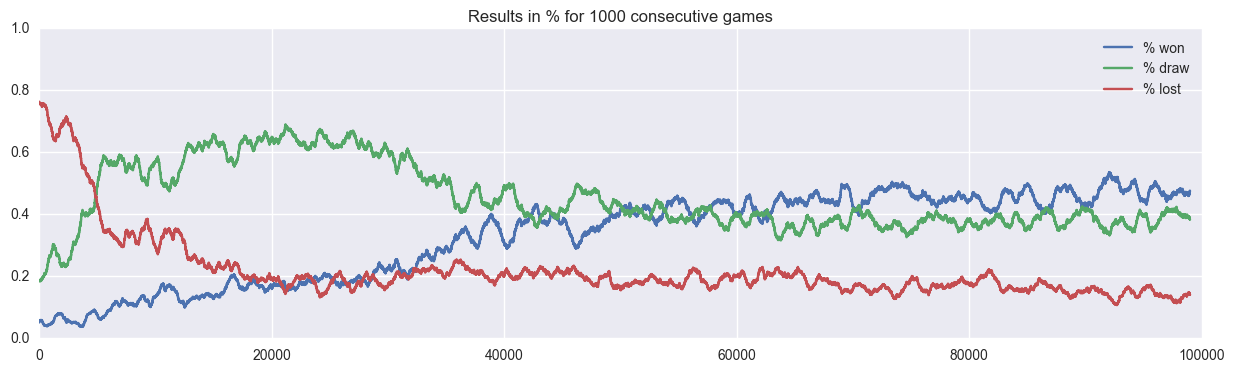

In [41]:
# Launch n episodes of the game
game.run_n_episodes(20000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

Most of the time, the agents blocked each other attacks. And it ends with a draw. 

In [57]:
game.run_episode()

| o | o | x |
| x | x | o |
| o | o | x |
3x3 TicTacToe grid
>>> It's a draw !


![](images/game_rules_rl_agents.gif)

##### Conclusion
Even after 100,000 episodes the agent had not really mastered the rules-based agent. <br>
The training was extremely slow. We can probably improve the performances.<br>

### Using an agent pre-trained on the random agent
It would be interesting to pre-train the agent on the random situation, as the agent master it.<br>
At least so that the agent would learn the basic rules and tricks. And then only challenged it against the rules-based agent. 

In [ ]:
# Define the players
player0 = AI_Random_Agent()
player1 = AI_Rules_Agent()
player2 = AI_RL_Agent(**params)

# Define the game between the two players
game = Game(player0,player2)

# Launch n episodes of the game
game.run_n_episodes(5000)

# Change the player
game.agent1 = player1

# Launch the other episodes
game.run_n_episodes(35000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

## RL Agent VS RL Agent

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:57<00:00, 85.41it/s]


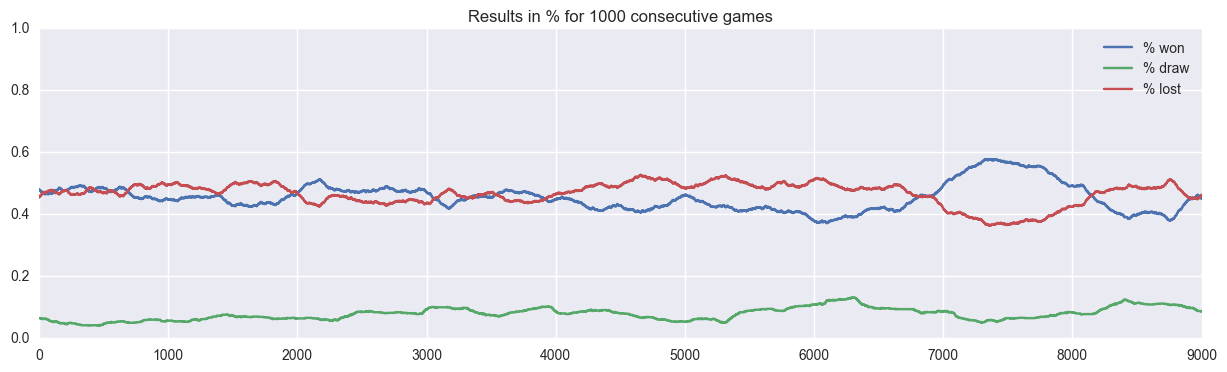

In [60]:
player1 = AI_RL_Agent(**params)
player2 = AI_RL_Agent(**params)

# Define the game between the two players
game = Game(player1,player2)

# Launch n episodes of the game
game.run_n_episodes(10000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:56<00:00, 85.80it/s]


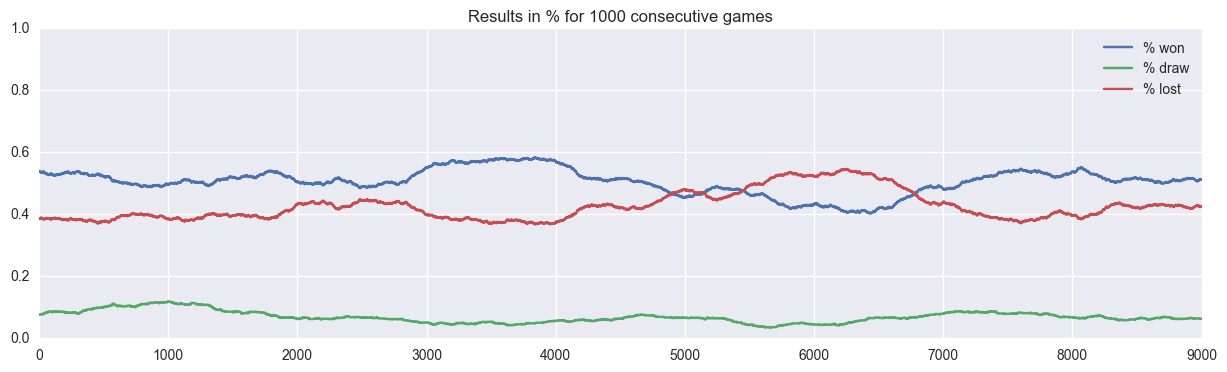

In [61]:
player1 = AI_RL_Agent()
player2 = AI_RL_Agent(**params)

# Define the game between the two players
game = Game(player1,player2)

# Launch n episodes of the game
game.run_n_episodes(10000)

# Plot the results
game.plot_results_during_training(player2.running_rewards,rollback=1000)

***
# Conclusions and improvements

Even if the rules-based agent was not perfect having some strong weaknesses, the RL agent was not able to really beat it. <br>
Thus was far from reaching a superhuman level. <br>
However it was interesting to fully develop the environment, different types of agents, enabling the possibility to try several experiments<br><br>

I will eventually continue working on the problem and succeed to beat the rules-based agent by improving the modelling : 
- by changing how the grid is vectorized, taking a denser representation
- by switching to a more complex neural network architecture such as convolutional neural network
- by improving the rl learning framework, such as A3C